## Random Forest Classifier

## Step1: Data Gathering

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
path = r"G:\Machine Learning\Assignment\Mobile Price Clasification\DataSet\train.csv"
df = pd.read_csv(path)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Step2: Perform basic data quality checks

In [4]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## There are no misssing values in this dataset

In [8]:
# Check the missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# Check the duplicates
df.duplicated().sum()

np.int64(0)

## There are no duplicates in this dataset

In [10]:
# Drop the duplicates
df = df.drop_duplicates()

## Step3: Separate Data into X and Y Features
    Y = 'price_range'
    X = Remaining all the features

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
X = df.drop(columns='price_range')
Y = df[['price_range']]

In [13]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
Y.head()

,price_range
0,1
1,2
2,2
3,2
4,1


## Step4: Data Preprocessing and Data Cleaning

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [19]:
con = list(X.columns[X.dtypes != 'object'])

In [20]:
print(con)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [22]:
pre = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
).set_output(transform='pandas')

In [23]:
pre

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [25]:
X_pre = pre.fit_transform(X)
X_pre.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


## Step5: Split the data into training and testing 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,train_size=0.80,random_state=21)

In [28]:
xtrain.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1490,-0.508796,1.010051,-0.885327,-1.019184,0.159088,-1.043966,-1.105027,-0.006069,-1.080761,-0.664768,0.673534,-0.698961,-1.324987,0.155641,-1.734608,-1.094526,-1.649584,-1.786861,0.994018,-1.014099
965,0.319779,-0.990050,-1.253064,0.981177,-0.762495,-1.043966,-0.719165,-0.699686,-0.176571,1.521249,1.168355,-0.581757,-1.343502,1.648549,-0.310171,-0.864922,1.462493,-1.786861,0.994018,0.986097
1216,-0.183285,-0.990050,-1.007906,0.981177,-0.762495,0.957886,-0.167933,0.687548,-0.487386,-1.101971,1.663176,-0.753055,1.260114,-0.536869,1.114266,0.742313,0.730240,0.559641,-1.006018,0.986097
500,0.089872,1.010051,-1.253064,0.981177,-0.762495,-1.043966,1.210147,-1.393304,-1.024249,1.521249,1.003414,-0.144495,-1.160670,-0.893728,-1.259796,-1.094526,1.645557,-1.786861,-1.006018,0.986097
403,0.540580,1.010051,-0.395011,0.981177,-0.992890,0.957886,1.265271,-1.393304,0.868898,-0.227564,-0.810929,2.244669,0.959252,-0.548856,0.164641,0.512708,-1.466521,0.559641,-1.006018,0.986097


In [29]:
xtest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
541,-1.014136,-0.990050,-0.395011,0.981177,-0.762495,0.957886,0.328176,0.340740,1.010178,-0.227564,-0.481048,1.309289,1.304086,0.935753,-1.497202,-1.094526,0.181050,0.559641,0.994018,0.986097
1211,-1.196241,1.010051,0.095305,-1.019184,0.619880,0.957886,-1.656260,-0.352878,1.151457,1.521249,-0.151168,1.275480,0.292726,-1.511547,-0.547577,0.053498,-1.283457,0.559641,0.994018,0.986097
1862,-0.445060,-0.990050,1.443675,-1.019184,-0.301703,-1.043966,-0.167933,-1.046495,-1.617624,1.521249,1.168355,0.545207,-0.829721,-0.867909,-1.734608,-0.635317,-0.551204,0.559641,-1.006018,-1.014099
1094,-1.253148,1.010051,-0.027274,-1.019184,-0.992890,-1.043966,-1.656260,1.727974,-1.448088,-0.664768,-1.305750,-0.843213,-0.885265,-1.598226,-1.734608,-0.864922,-0.551204,0.559641,0.994018,0.986097
465,0.784145,1.010051,0.095305,-1.019184,0.159088,0.957886,0.548669,1.034357,-0.628666,-0.664768,0.013773,-0.834197,-0.901466,1.408799,0.402047,0.971917,-0.368140,0.559641,-1.006018,-1.014099


In [30]:
ytrain.head()

,price_range
1490,1
965,3
1216,1
500,0
403,2


In [31]:
ytest.head()

,price_range
541,3
1211,0
1862,0
1094,0
465,3


## Step6: Build the model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model = RandomForestClassifier(
    n_estimators=5,
    max_depth=4,
    min_samples_leaf=2,
    min_samples_split=5,
    criterion='gini'
)
model.fit(xtrain,ytrain)

,n_estimators,5
,criterion,'gini'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
model.score(xtrain,ytrain)

0.769375

In [46]:
model.score(xtest,ytest)

0.685

In [47]:
params = {
    'n_estimators':[5,10,35,50,75,100,150],
    'max_depth':[3,5,7,9,11]
}

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [49]:
base_model = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=base_model,param_distributions=params,cv=3,scoring='f1_macro')
rscv.fit(xtrain,ytrain)

,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [3, 5, ...], 'n_estimators': [5, 10, ...]}"
,n_iter,10
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [50]:
rscv.best_params_

{'n_estimators': 150, 'max_depth': 9}

In [51]:
rscv.best_score_

np.float64(0.8681066547911627)

In [52]:
best_rfc = rscv.best_estimator_

In [53]:
best_rfc.score(xtrain,ytrain)

0.995625

In [54]:
best_rfc.score(xtest,ytest)

0.885

## Step8: Model Evaluation

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay

In [58]:
ypred_test = model.predict(xtest)
ypred_test[:5]

array([2, 0, 0, 0, 3])

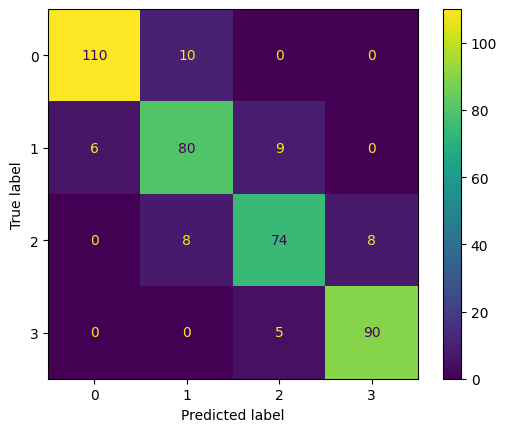

In [59]:
ConfusionMatrixDisplay.from_estimator(best_rfc,xtest,ytest)

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       120
           1       0.67      0.56      0.61        95
           2       0.48      0.69      0.56        90
           3       0.76      0.60      0.67        95

    accuracy                           0.69       400
   macro avg       0.70      0.67      0.68       400
weighted avg       0.71      0.69      0.69       400

